In [215]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [216]:
import pandas as pd

df = pd.read_csv("fetal_maternal_health_missing.csv")

df.head()


,Age,Blood Pressure,Glucose Level,Fetal Heart Rate,Uterine Contractions,Hemoglobin Level,Body Temperature,Previous Miscarriages,Smoking History,BMI,...,Thyroid Disorder,Diabetes History,Alcohol Consumption,Exercise Frequency,Prenatal Care Visits,Iron Deficiency,Vitamin Deficiency,Stress Levels,Sleep Hours,Risk Level
0,24,151.0,102.0,118.0,3.0,11.3,37.4,1.0,1.0,29.9,...,0.0,0.0,0.0,6.0,5.0,0.0,0.0,1.0,7.4,2.0
1,37,NaN,NaN,147.0,1.0,9.2,NaN,0.0,0.0,19.9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,7.0,2.0
2,32,98.0,135.0,157.0,5.0,11.6,36.9,1.0,0.0,34.9,...,0.0,0.0,0.0,4.0,11.0,0.0,0.0,7.0,4.4,2.0
3,28,101.0,79.0,169.0,1.0,9.9,36.9,0.0,0.0,21.1,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,6.0,4.3,2.0
4,25,90.0,74.0,172.0,6.0,9.8,37.7,0.0,0.0,28.1,...,0.0,0.0,0.0,3.0,13.0,0.0,1.0,2.0,5.1,0.0


In [217]:
print("Missing Values:\n", df.isnull().sum())

df.fillna(df.median(), inplace=True)

print("Missing Values After Imputation:\n", df.isnull().sum())


Missing Values:
 Age                       0
Blood Pressure            8
Glucose Level             5
Fetal Heart Rate         14
Uterine Contractions      8
Hemoglobin Level          9
Body Temperature          5
Previous Miscarriages    13
Smoking History          11
BMI                       6
Gestational Age           5
Amniotic Fluid Index      5
Heart Disease History     9
Thyroid Disorder          3
Diabetes History          2
Alcohol Consumption       8
Exercise Frequency        8
Prenatal Care Visits     10
Iron Deficiency           4
Vitamin Deficiency        6
Stress Levels             9
Sleep Hours               8
Risk Level                7
dtype: int64
Missing Values After Imputation:
 Age                      0
Blood Pressure           0
Glucose Level            0
Fetal Heart Rate         0
Uterine Contractions     0
Hemoglobin Level         0
Body Temperature         0
Previous Miscarriages    0
Smoking History          0
BMI                      0
Gestational Age       

In [218]:
print(df.columns)

Index(['Age', 'Blood Pressure', 'Glucose Level', 'Fetal Heart Rate',
       'Uterine Contractions', 'Hemoglobin Level', 'Body Temperature',
       'Previous Miscarriages', 'Smoking History', 'BMI', 'Gestational Age',
       'Amniotic Fluid Index', 'Heart Disease History', 'Thyroid Disorder',
       'Diabetes History', 'Alcohol Consumption', 'Exercise Frequency',
       'Prenatal Care Visits', 'Iron Deficiency', 'Vitamin Deficiency',
       'Stress Levels', 'Sleep Hours', 'Risk Level'],
      dtype='object')


C:\Users\PARAG\AppData\Local\Temp\ipykernel_18780\4027560029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Risk Level"], palette="Set2")


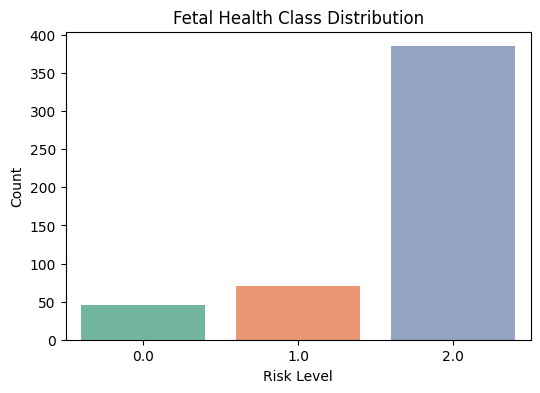

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df["Risk Level"], palette="Set2")
plt.title("Fetal Health Class Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()


In [220]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
y = encoder.fit_transform(df["Risk Level"])  

X = df.drop(columns=["Risk Level"])  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)


X_train shape: (400, 22)


In [221]:
print("Original Risk Level Categories:", df["Risk Level"].unique())
print("Encoded Risk Level Categories:", set(y_encoded))   

import pandas as pd

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  
print("\nScaled Feature Sample:\n", X_scaled_df.head())  


Original Risk Level Categories: [2. 0. 1.]
Encoded Risk Level Categories: {0, 1, 2, 3}

Scaled Feature Sample:
         Age  Blood Pressure  Glucose Level  Fetal Heart Rate  \
0 -0.851162        1.339994      -0.794565         -1.294646   
1  0.745995       -0.024860      -0.076825          0.173666   
2  0.131704       -1.243479       0.082673          0.679980   
3 -0.359729       -1.097245      -1.405974          1.287558   
4 -0.728304       -1.633438      -1.538889          1.439452   

   Uterine Contractions  Hemoglobin Level  Body Temperature  \
0             -0.566472         -0.319416         -0.168506   
1             -1.283525         -1.352011          0.064559   
2              0.150581         -0.171903         -0.751166   
3             -1.283525         -1.007813         -0.751166   
4              0.509108         -1.056984          0.181091   

   Previous Miscarriages  Smoking History       BMI  ...  \
0                    2.0         3.179797  0.742622  ...   
1   

In [222]:
!pip install hmmlearn


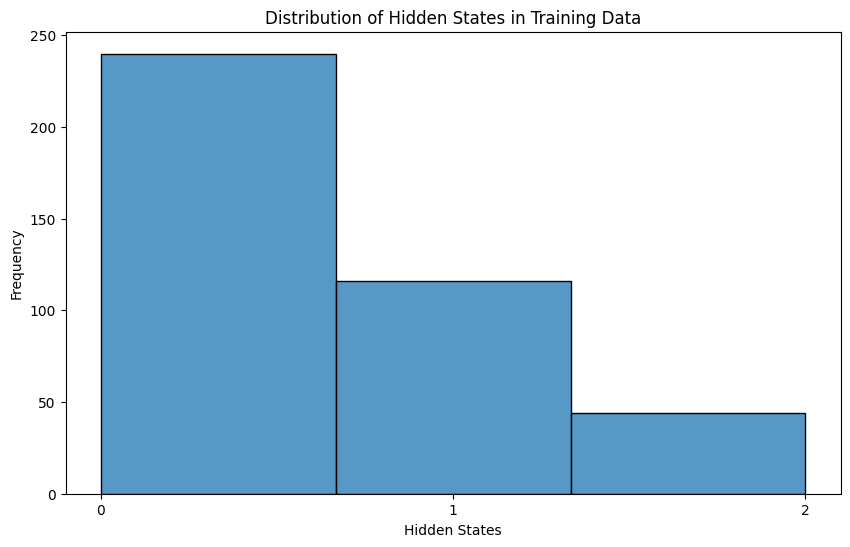

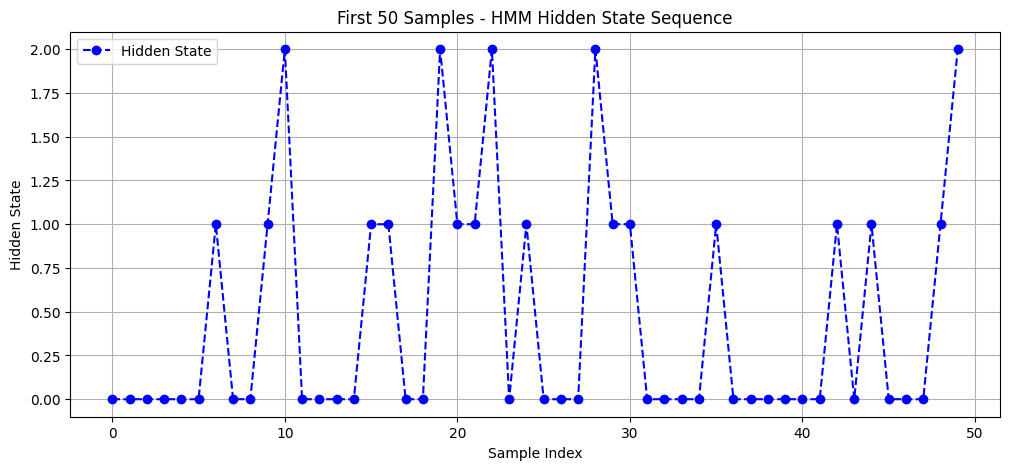

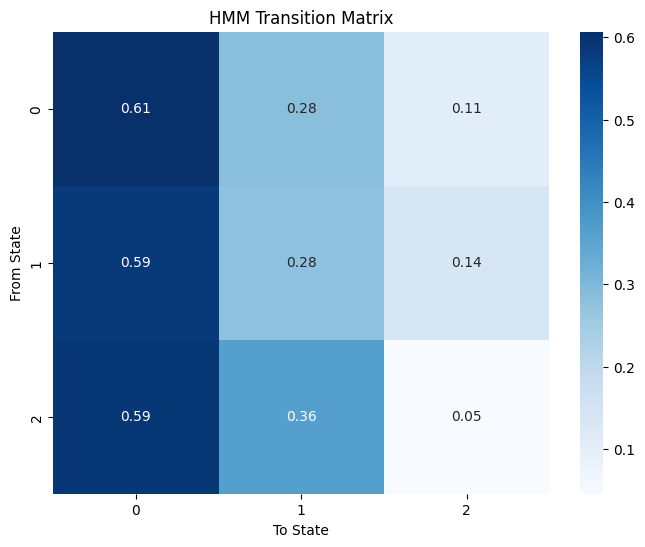

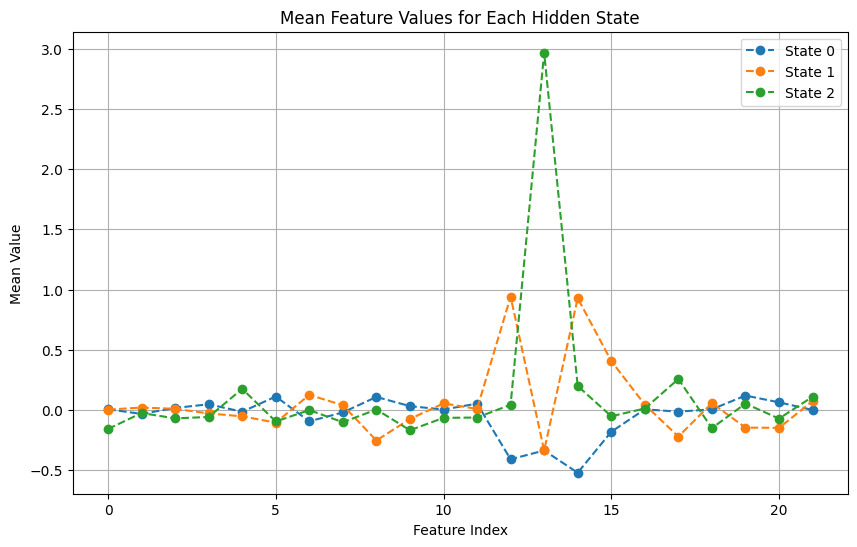

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn.hmm import GaussianHMM  

%matplotlib inline  

hmm_model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)
hmm_model.fit(X_train)

hidden_states_train = hmm_model.predict(X_train)

plt.figure(figsize=(10, 6))
sns.histplot(hidden_states_train, bins=3, kde=False)
plt.xlabel("Hidden States")
plt.ylabel("Frequency")
plt.title("Distribution of Hidden States in Training Data")
plt.xticks(range(3))
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(hidden_states_train[:50], marker="o", linestyle="dashed", color="blue", label="Hidden State")
plt.xlabel("Sample Index")
plt.ylabel("Hidden State")
plt.title("First 50 Samples - HMM Hidden State Sequence")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(hmm_model.transmat_, annot=True, cmap="Blues", fmt=".2f", xticklabels=range(3), yticklabels=range(3))
plt.xlabel("To State")
plt.ylabel("From State")
plt.title("HMM Transition Matrix")
plt.show()

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(hmm_model.means_[i], marker="o", linestyle="dashed", label=f"State {i}")
plt.xlabel("Feature Index")
plt.ylabel("Mean Value")
plt.title("Mean Feature Values for Each Hidden State")
plt.legend()
plt.grid()
plt.show()


In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


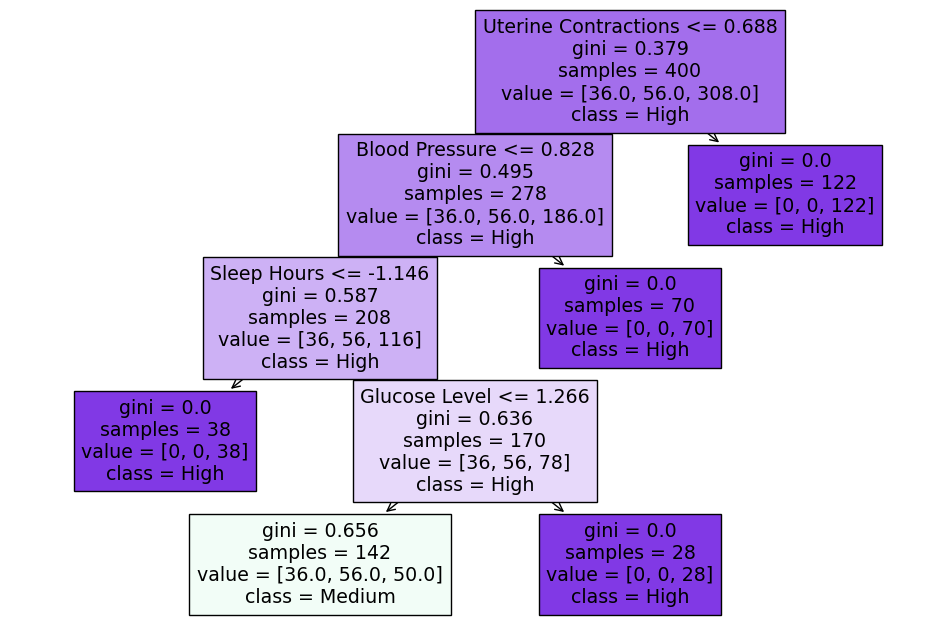

In [226]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

feature_names = X.columns if isinstance(X, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=feature_names, class_names=['Low', 'Medium', 'High'], filled=True)
plt.show()


In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.25      0.07      0.11        14
           2       0.80      0.99      0.88        77

    accuracy                           0.77       100
   macro avg       0.35      0.35      0.33       100
weighted avg       0.65      0.77      0.70       100



In [228]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.82
              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       1.00      0.21      0.35        14
           2       0.81      1.00      0.90        77

    accuracy                           0.82       100
   macro avg       0.94      0.48      0.54       100
weighted avg       0.85      0.82      0.77       100



In [229]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC(probability=True)

voting_clf = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('svc', svc)], voting='hard')
voting_clf.fit(X_train, y_train)

print("Max Voting Accuracy:", voting_clf.score(X_test, y_test))


Max Voting Accuracy: 0.79


In [230]:
import numpy as np

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svc.fit(X_train, y_train)

preds = (lr.predict_proba(X_test) + rf.predict_proba(X_test) + svc.predict_proba(X_test)) / 3
final_preds = np.argmax(preds, axis=1)

print("Averaging Accuracy:", accuracy_score(y_test, final_preds))

Averaging Accuracy: 0.78


In [231]:
weights = [0.4, 0.35, 0.25]  

weighted_preds = (weights[0] * lr.predict_proba(X_test) +
                  weights[1] * rf.predict_proba(X_test) +
                  weights[2] * svc.predict_proba(X_test))

final_weighted_preds = np.argmax(weighted_preds, axis=1)

print("Weighted Averaging Accuracy:", accuracy_score(y_test, final_weighted_preds))

Weighted Averaging Accuracy: 0.78


In [232]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('svc', svc)],
    final_estimator=LogisticRegression()
)

stacking_clf.fit(X_train, y_train)
print("Stacking Accuracy:", stacking_clf.score(X_test, y_test))

Stacking Accuracy: 0.88


In [233]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.92
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       1.00      0.64      0.78        14
           2       0.91      1.00      0.95        77

    accuracy                           0.92       100
   macro avg       0.97      0.77      0.84       100
weighted avg       0.93      0.92      0.91       100



C:\Users\PARAG\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:10:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


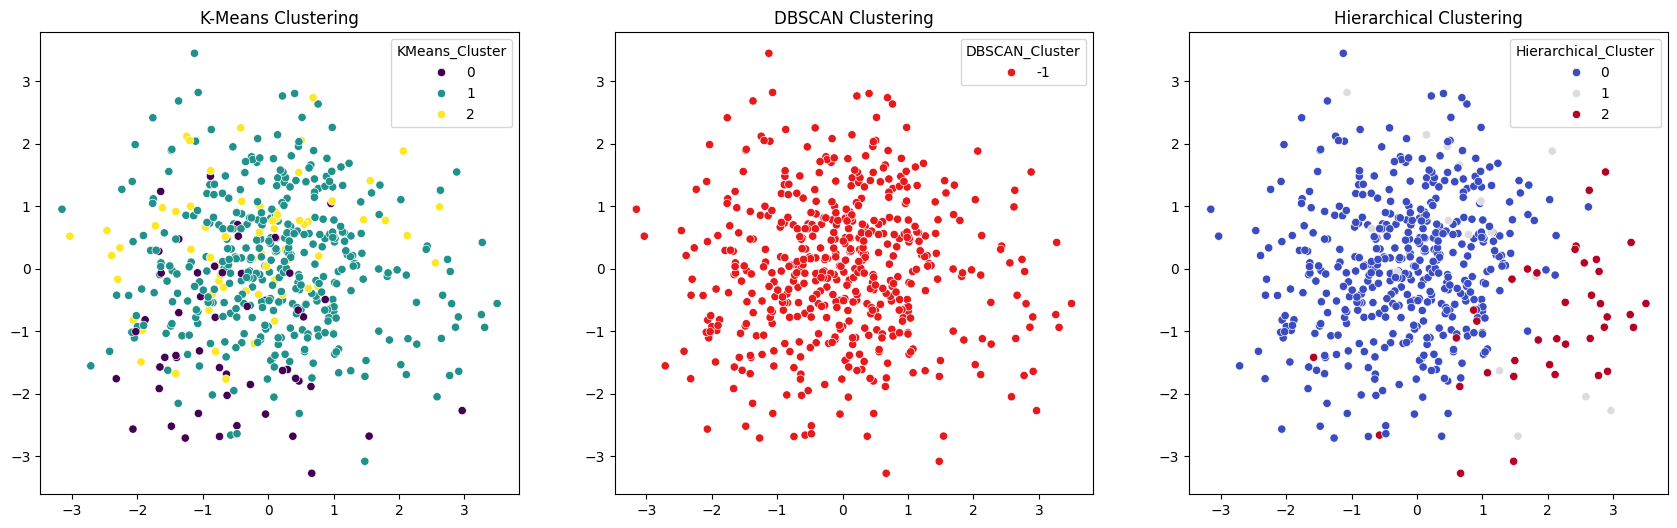

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

df = pd.read_csv("fetal_maternal_health_missing.csv")

imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_imputed["KMeans_Cluster"] = kmeans.fit_predict(scaled_features)

dbscan = DBSCAN(eps=1.5, min_samples=5)
df_imputed["DBSCAN_Cluster"] = dbscan.fit_predict(scaled_features)

hierarchical = AgglomerativeClustering(n_clusters=3)
df_imputed["Hierarchical_Cluster"] = hierarchical.fit_predict(scaled_features)

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

fig, axes = plt.subplots(1, 3, figsize=(21, 6))

sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df_imputed["KMeans_Cluster"], palette="viridis", ax=axes[0])
axes[0].set_title("K-Means Clustering")

sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df_imputed["DBSCAN_Cluster"], palette="Set1", ax=axes[1])
axes[1].set_title("DBSCAN Clustering")

sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df_imputed["Hierarchical_Cluster"], palette="coolwarm", ax=axes[2])
axes[2].set_title("Hierarchical Clustering")

plt.show()

In [235]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

df = pd.read_csv("fetal_maternal_health_missing.csv")

imputer = SimpleImputer(strategy="median")
df_imputed = imputer.fit_transform(df.iloc[:, :-1])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_features)

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_features)

def evaluate_clusters(labels, data):
    if len(set(labels)) > 1:  
        silhouette = silhouette_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
        calinski_harabasz = calinski_harabasz_score(data, labels)
    else:
        silhouette, davies_bouldin, calinski_harabasz = -1.0, float('inf'), -1.0
    return silhouette, davies_bouldin, calinski_harabasz

kmeans_metrics = evaluate_clusters(kmeans_labels, scaled_features)
dbscan_metrics = evaluate_clusters(dbscan_labels, scaled_features)
hierarchical_metrics = evaluate_clusters(hierarchical_labels, scaled_features)

print(f"K-Means Clustering:\n   Silhouette Score: {kmeans_metrics[0]:.4f}\n   Davies-Bouldin Index: {kmeans_metrics[1]:.4f}\n   Calinski-Harabasz Index: {kmeans_metrics[2]:.4f}\n")
print(f"DBSCAN Clustering:\n   Silhouette Score: {dbscan_metrics[0]:.4f}\n   Davies-Bouldin Index: {dbscan_metrics[1]:.4f}\n   Calinski-Harabasz Index: {dbscan_metrics[2]:.4f}\n")
print(f"Hierarchical Clustering:\n   Silhouette Score: {hierarchical_metrics[0]:.4f}\n   Davies-Bouldin Index: {hierarchical_metrics[1]:.4f}\n   Calinski-Harabasz Index: {hierarchical_metrics[2]:.4f}\n")

K-Means Clustering:
   Silhouette Score: 0.0941
   Davies-Bouldin Index: 2.8953
   Calinski-Harabasz Index: 24.9178

DBSCAN Clustering:
   Silhouette Score: -1.0000
   Davies-Bouldin Index: inf
   Calinski-Harabasz Index: -1.0000

Hierarchical Clustering:
   Silhouette Score: 0.1234
   Davies-Bouldin Index: 2.1350
   Calinski-Harabasz Index: 24.2746



In [236]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.8


In [237]:
import pickle

with open("fetal_health_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)


In [238]:
with open("fetal_health_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

import numpy as np
sample_data = np.array(X_test[0]).reshape(1, -1)
prediction = loaded_model.predict(sample_data)

print("Predicted Fetal Health Class:", prediction)


Predicted Fetal Health Class: [2]


In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


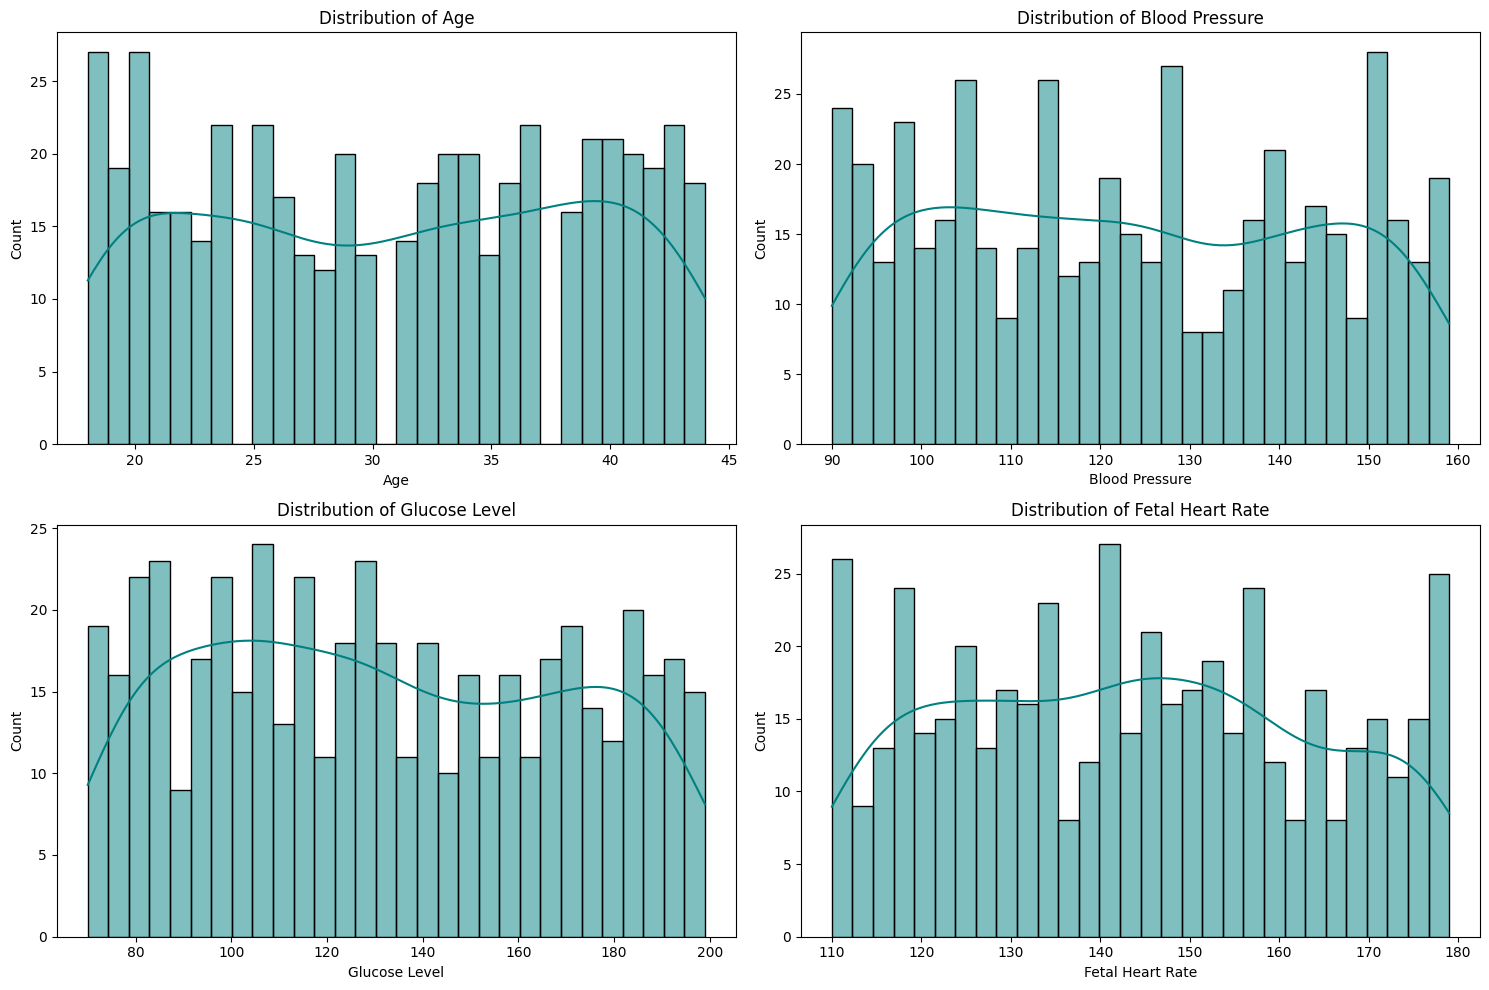

In [240]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(["Age", "Blood Pressure", "Glucose Level", "Fetal Heart Rate"]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color="teal")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


C:\Users\PARAG\AppData\Local\Temp\ipykernel_18780\465789365.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Risk Level", data=df, palette="Set2")


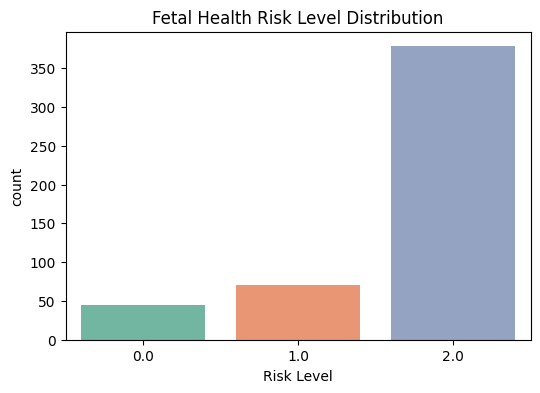

In [241]:
plt.figure(figsize=(6,4))
sns.countplot(x="Risk Level", data=df, palette="Set2")
plt.title("Fetal Health Risk Level Distribution")
plt.show()


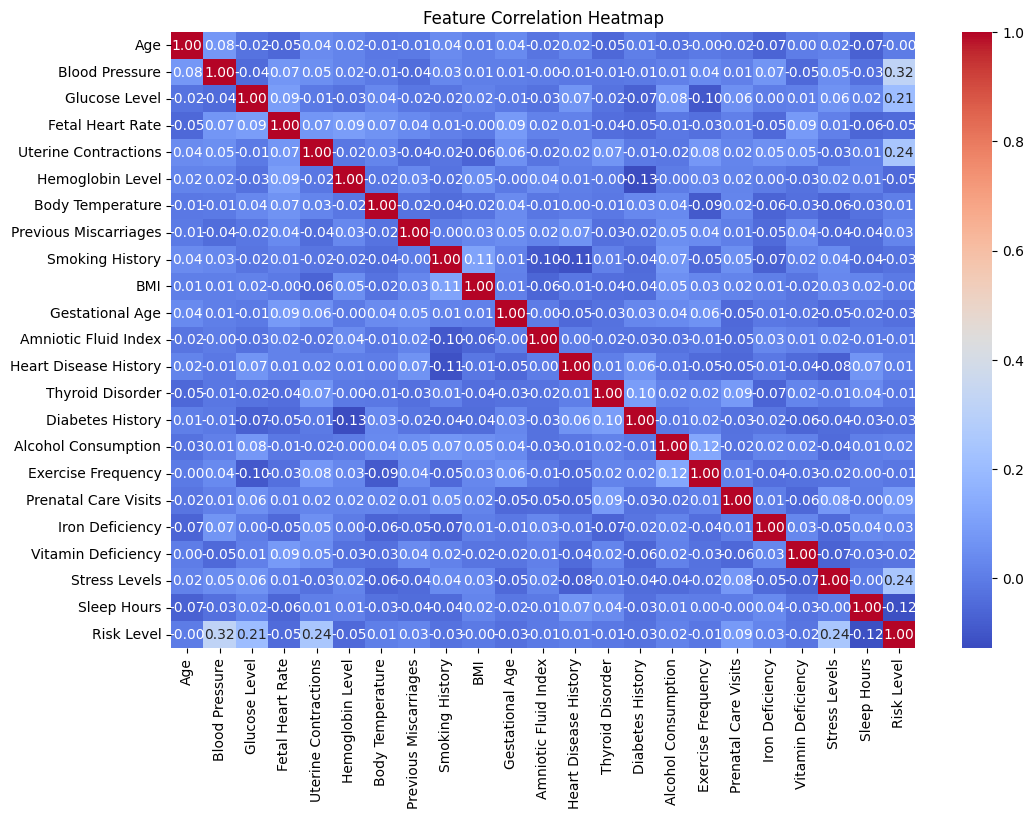

In [242]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [243]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df["Risk Level"])

X = df.drop(columns=["Risk Level"])  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="linear")
}

performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    performance[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.7800
Random Forest Accuracy: 0.8800
Gradient Boosting Accuracy: 0.9500
Support Vector Machine Accuracy: 0.8000


C:\Users\PARAG\AppData\Local\Temp\ipykernel_18780\1548139845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(performance.keys()), y=list(performance.values()), palette="viridis")


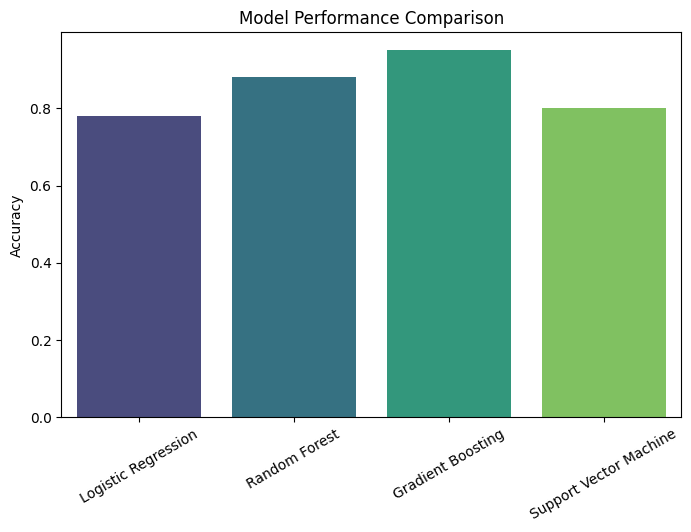

In [245]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(performance.keys()), y=list(performance.values()), palette="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()


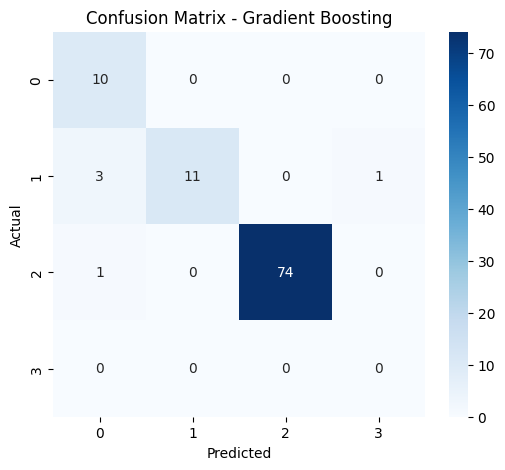

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.73      0.85        15
           2       1.00      0.99      0.99        75
           3       0.00      0.00      0.00         0

    accuracy                           0.95       100
   macro avg       0.68      0.68      0.67       100
weighted avg       0.97      0.95      0.96       100



C:\Users\PARAG\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PARAG\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PARAG\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [246]:
best_model = max(performance, key=performance.get)  
final_model = models[best_model]
y_pred_best = final_model.predict(X_test)

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, cmap="Blues", fmt="d")
plt.title(f"Confusion Matrix - {best_model}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Classification Report for {best_model}:\n")
print(classification_report(y_test, y_pred_best))


C:\Users\PARAG\AppData\Local\Temp\ipykernel_18780\936441831.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="coolwarm")


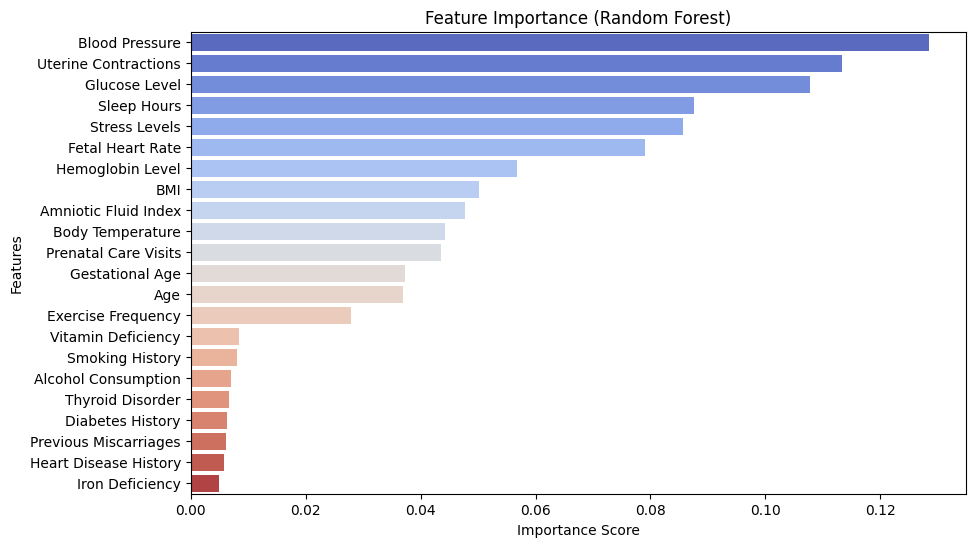

In [247]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette="coolwarm")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


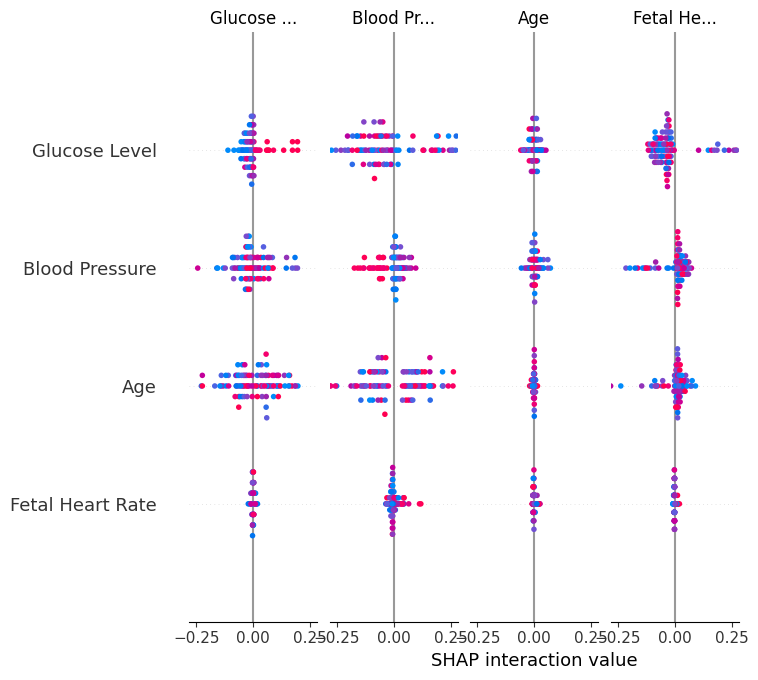

In [248]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [249]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


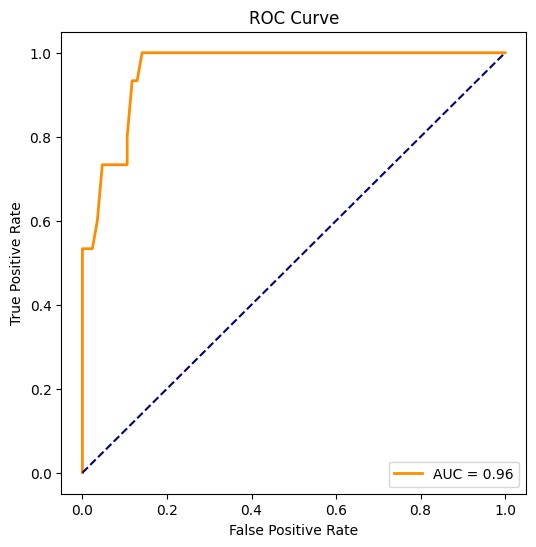

In [250]:
from sklearn.metrics import roc_curve, auc

y_score = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [251]:
!pip install tpot


In [252]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)

print(tpot.fitted_pipeline_)


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9200000000000002

Generation 2 - Current best internal CV score: 0.925

Generation 3 - Current best internal CV score: 0.925

Generation 4 - Current best internal CV score: 0.9274999999999999

Generation 5 - Current best internal CV score: 0.9425000000000001

Best pipeline: DecisionTreeClassifier(MaxAbsScaler(input_matrix), criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=16)
Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=4,
                                        min_samples_split=16))])
